<a href="https://colab.research.google.com/github/Camilo899/IntroduccionIA/blob/main/03%20-%20modelos_supervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploración de Datos**


---


---



# **Importando Librearías**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier





# Aq**uisición de Datos**

---



## Accediendo al Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cargando Base de Datos (Drive)

In [ ]:
import pandas as pd

data = pd.read_excel('/content/drive/MyDrive/UDEA/2023-02/IntroduccionIA/Proyecto/Telco_customer_churn.xlsx')


## ***Cargando de Forma Local***

In [ ]:
import pandas as pd

# Cargar el archivo Excel en un data_2Frame
data = pd.read_excel('/content/Telco_customer_churn.xlsx')

- **Nota**: Los datos de la Base de Datos Provienen de : https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset

## **Revisión Inicial**

---



In [ ]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## Desccripción de Columnas

In [ ]:
print(data.columns)
print('\n',data.shape)

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

 (7043, 33)


## Imprimiendo data 2 (Excluyendo algunas Columnas)

In [ ]:
columnas_a_excluir = ['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',...]

# Selecciona solo las columnas que no están en la lista de columnas a excluir
data_2= data[data.columns.difference(columnas_a_excluir)]

# Imprime el dataFrame filtrado
print(data_2)

      CLTV Churn Label                   Churn Reason  Churn Score  \
0     3239         Yes   Competitor made better offer           86   
1     2701         Yes                          Moved           67   
2     5372         Yes                          Moved           86   
3     5003         Yes                          Moved           84   
4     5340         Yes  Competitor had better devices           89   
...    ...         ...                            ...          ...   
7038  5306          No                            NaN           45   
7039  2140          No                            NaN           59   
7040  5560          No                            NaN           71   
7041  2793          No                            NaN           59   
7042  5097          No                            NaN           38   

      Churn Value          City        Contract Dependents  \
0               1   Los Angeles  Month-to-month         No   
1               1   Los Angeles  Mo

## **Valores Faltantes**


In [ ]:
valores_faltantes = data_2.isnull().sum()
porcentaje_faltantes = data_2.isnull().sum() * 100 / len(data_2)

# Creando un dataFrame con los resultados
df_faltantes = pd.DataFrame({'Valores Faltantes': valores_faltantes, 'Porcentaje Faltantes (%)': porcentaje_faltantes})

df_faltantes.reset_index(inplace=True)
df_faltantes.rename(columns={'index': 'ID'}, inplace=True)

# Imprimiendo los resultados
print(df_faltantes)

                   ID  Valores Faltantes  Porcentaje Faltantes (%)
0                CLTV                  0                       0.0
1         Churn Label                  0                       0.0
2        Churn Reason                  0                       0.0
3         Churn Score                  0                       0.0
4         Churn Value                  0                       0.0
5                City                  0                       0.0
6            Contract                  0                       0.0
7          Dependents                  0                       0.0
8   Device Protection                  0                       0.0
9              Gender                  0                       0.0
10   Internet Service                  0                       0.0
11    Monthly Charges                  0                       0.0
12     Multiple Lines                  0                       0.0
13      Online Backup                  0                      

In [ ]:

# Reemplazando valores faltantes
data_2['Churn Reason'] = data_2['Churn Reason'].fillna('No proporcionado')

valores_faltantes = data_2.isnull().sum()
porcentaje_faltantes = data_2.isnull().sum() * 100 / len(data_2)

# Creando un dataFrame con los resultados
df_faltantes = pd.DataFrame({'Valores Faltantes': valores_faltantes, 'Porcentaje Faltantes (%)': porcentaje_faltantes})

df_faltantes.reset_index(inplace=True)
df_faltantes.rename(columns={'index': 'ID'}, inplace=True)

# Imprimiendo los resultados
print(df_faltantes)

                   ID  Valores Faltantes  Porcentaje Faltantes (%)
0                CLTV                  0                       0.0
1         Churn Label                  0                       0.0
2        Churn Reason                  0                       0.0
3         Churn Score                  0                       0.0
4         Churn Value                  0                       0.0
5                City                  0                       0.0
6            Contract                  0                       0.0
7          Dependents                  0                       0.0
8   Device Protection                  0                       0.0
9              Gender                  0                       0.0
10   Internet Service                  0                       0.0
11    Monthly Charges                  0                       0.0
12     Multiple Lines                  0                       0.0
13      Online Backup                  0                      

<ipython-input-9-b67a1c9ddabe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Churn Reason'] = data_2['Churn Reason'].fillna('No proporcionado')


## Simulación de Datos Faltantes

In [ ]:
# Seleccionando Columnas para aplicar datos faltantes
columns = ['Online Backup', 'Streaming TV', 'Phone Service']

for col in columns:
    # Selecciona el 5% de los datos para ser reemplazados
    num_missing = int(len(data_2[col]) * 0.05)

    # Genera índices aleatorios para datos a ser reemplazados
    missing_indices = pd.Index(np.random.choice(data_2[col].index, replace=False, size=num_missing))

    # Reemplaza los datos en los índices seleccionados con NaN
    data_2.loc[missing_indices, col] = np.nan


# Procenjate de datos faltantes
missing_values = data_2.isnull().sum().sum()
total_values = data_2.size

missing_percentage = (missing_values / total_values) * 100

print("Porcentaje de datos faltantes: ", missing_percentage)

Porcentaje de datos faltantes:  0.5997444270907284


In [ ]:
missing_values = data_2.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
CLTV                   0
Churn Label            0
Churn Reason           0
Churn Score            0
Churn Value            0
City                   0
Contract               0
Dependents             0
Device Protection      0
Gender                 0
Internet Service       0
Monthly Charges        0
Multiple Lines         0
Online Backup        352
Online Security        0
Paperless Billing      0
Partner                0
Payment Method         0
Phone Service        352
Senior Citizen         0
Streaming Movies       0
Streaming TV         352
Tech Support           0
Tenure Months          0
Total Charges          0
dtype: int64


## Reemplazo de Variables Categóricas por Númericas

In [ ]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Ajustar y transformar los datos de la columna 'City' a numéricos
data_2['City'] = le.fit_transform(data_2['City'])
data_2['Gender'] = le.fit_transform(data_2['Gender'])
data_2['Senior Citizen'] = le.fit_transform(data_2['Senior Citizen'])
data_2['Partner'] = le.fit_transform(data_2['Partner'])
data_2['Dependents'] = le.fit_transform(data_2['Dependents'])
data_2['Phone Service'] = le.fit_transform(data_2['Phone Service'])
# Ajustar y transformar los datos de la columna 'City' a numéricos
data_2['Multiple Lines'] = le.fit_transform(data_2['Multiple Lines'])
data_2['Internet Service'] = le.fit_transform(data_2['Internet Service'])
data_2['Online Security'] = le.fit_transform(data_2['Online Security'])
data_2['Online Backup'] = le.fit_transform(data_2['Online Backup'])
data_2['Device Protection'] = le.fit_transform(data_2['Device Protection'])
data_2['Tech Support'] = le.fit_transform(data_2['Tech Support'])
# Ajustar y transformar los datos de la columna 'City' a numéricos
data_2['Streaming TV'] = le.fit_transform(data_2['Streaming TV'])
data_2['Streaming Movies'] = le.fit_transform(data_2['City'])
data_2['Contract'] = le.fit_transform(data_2['Contract'])
data_2['Paperless Billing'] = le.fit_transform(data_2['Paperless Billing'])
data_2['Payment Method'] = le.fit_transform(data_2['Payment Method'])
data_2['Churn Label'] = le.fit_transform(data_2['Churn Label'])

## Limpieza de Datos

---



In [ ]:

# Paso 3: Eliminar filas con valores faltantes
df_sin_filas_faltantes = data_2.dropna()

# Paso 4: Rellenar valores faltantes con un valor específico (por ejemplo, el promedio de la columna)
promedio_columna_A = data_2['Online Backup'].mean()
#promedio_columna_B = data['Churn Score'].mean()
promedio_columna_C = data_2['Phone Service'].mean()
df_rellenado = data_2.fillna({'Online Backup': promedio_columna_A, 'Streaming TV': 0, 'Phone Service': promedio_columna_C,})  # Rellena CA y CC con el promedio y CB con 0

# Paso 5: Eliminar columnas con valores faltantes
#df_sin_columnas_faltantes = data.dropna(axis=1)

# Paso 6: Interpolación (relleno basado en valores cercanos)
df_interpolado = data_2.interpolate()

# Paso 7: Eliminar duplicados (si es necesario)
df_sin_duplicados = data_2.drop_duplicates()

# Paso 8: Guardar los resultados en un nuevo DataFrame o sobrescribir el original si es apropiado
df = df_sin_filas_faltantes  # Por ejemplo, reemplazar el DataFrame original con uno limpio


# 2. Contar valores faltantes por columna
missing_values = df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
CLTV                 0
Churn Label          0
Churn Reason         0
Churn Score          0
Churn Value          0
City                 0
Contract             0
Dependents           0
Device Protection    0
Gender               0
Internet Service     0
Monthly Charges      0
Multiple Lines       0
Online Backup        0
Online Security      0
Paperless Billing    0
Partner              0
Payment Method       0
Phone Service        0
Senior Citizen       0
Streaming Movies     0
Streaming TV         0
Tech Support         0
Tenure Months        0
Total Charges        0
dtype: int64


## Exploración Inicial

---



Primeras filas del dataset:
   CLTV  Churn Label                   Churn Reason  Churn Score  Churn Value  \
0  3239            1   Competitor made better offer           86            1   
1  2701            1                          Moved           67            1   
2  5372            1                          Moved           86            1   
3  5003            1                          Moved           84            1   
4  5340            1  Competitor had better devices           89            1   

   City  Contract  Dependents  Device Protection  Gender  ...  \
0   562         0           0                  0       1  ...   
1   562         0           1                  0       0  ...   
2   562         0           1                  2       0  ...   
3   562         0           1                  2       0  ...   
4   562         0           1                  2       1  ...   

   Paperless Billing  Partner  Payment Method  Phone Service  Senior Citizen  \
0             

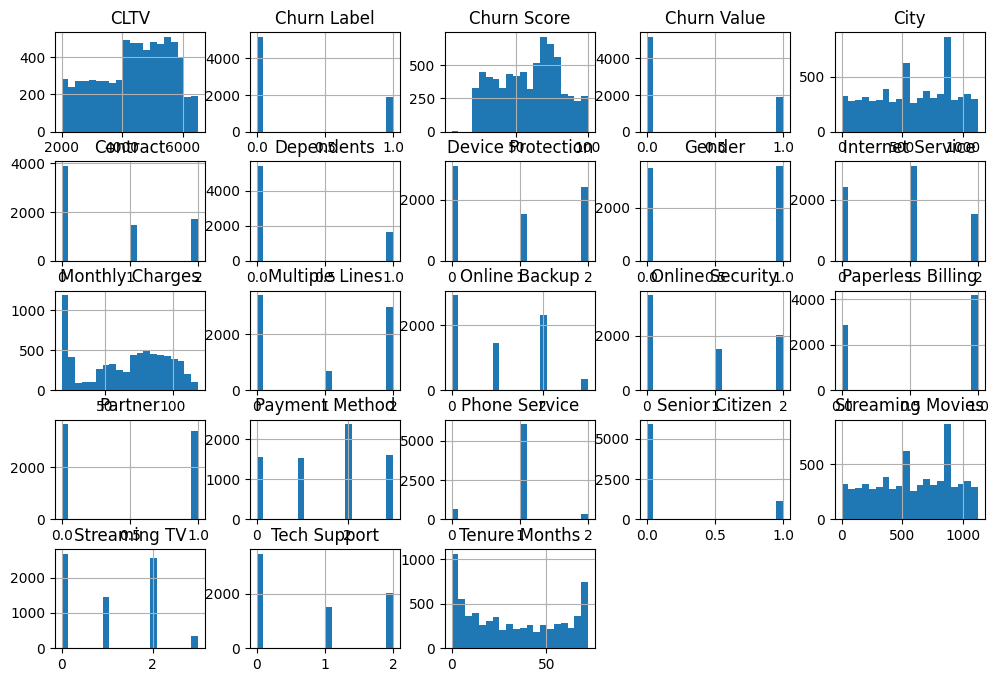


Boxplots de variables numéricas:


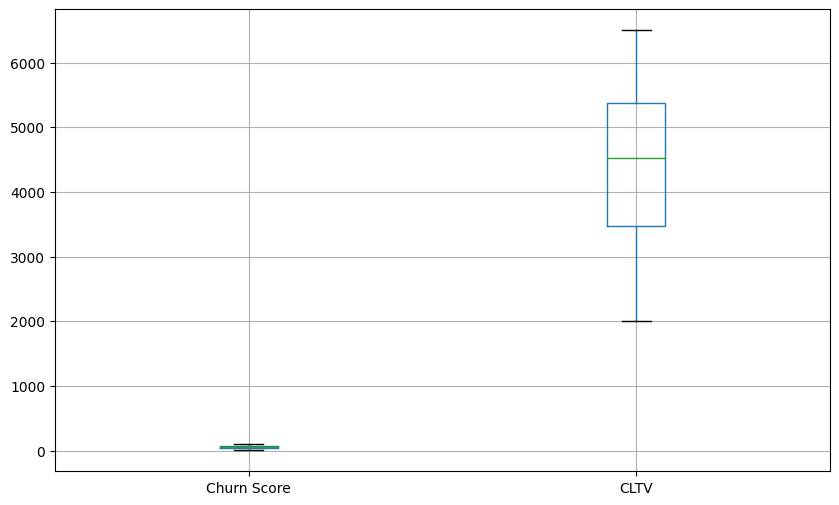


Gráfico de barras de variables categóricas:


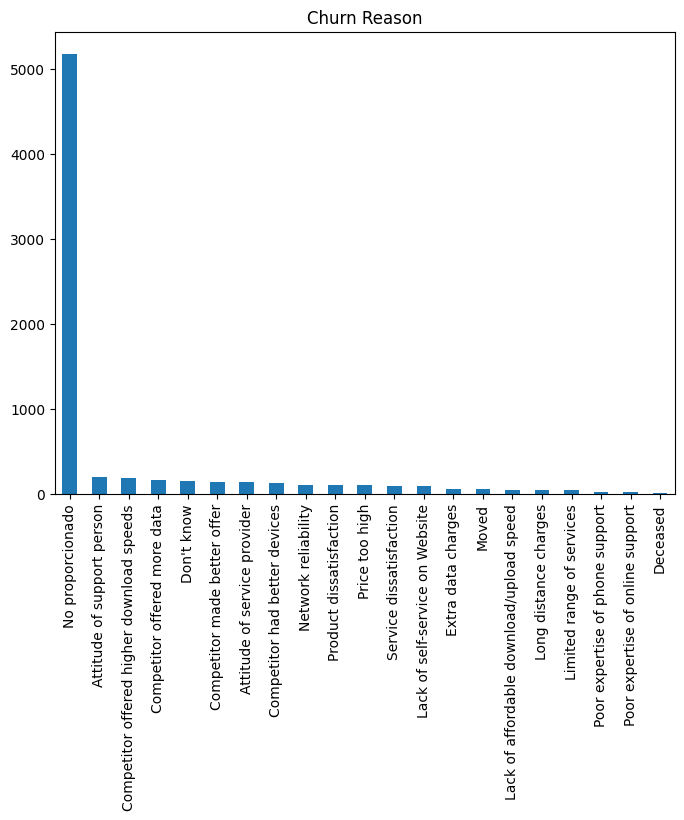

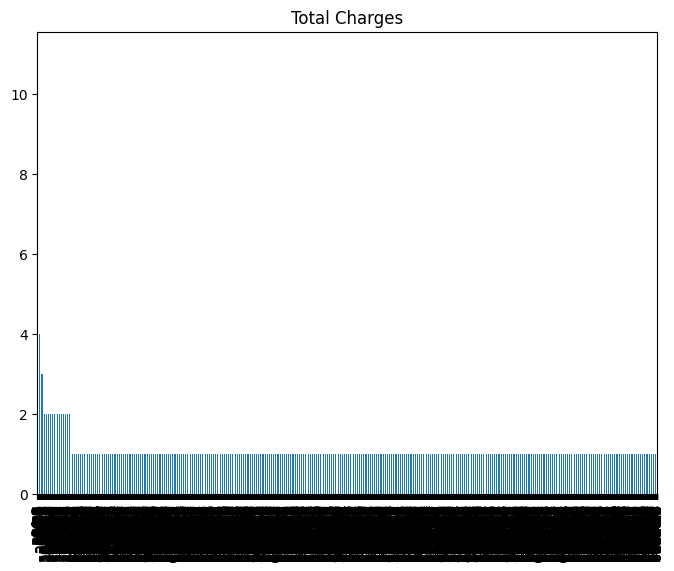

In [ ]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Obtener información general del dataset
print("\n----------Información general del dataset:")
print(df.info())

# Resumen estadístico de las variables numéricas
print("\n----------Resumen estadístico de las variables numéricas:")
print(df.describe())

# Conteo de valores únicos en variables categóricas
print("\n------------Conteo de valores únicos en variables categóricas:")
categoricas = df.select_dtypes(include=['object'])  # Seleccionar variables categóricas
for columna in categoricas.columns:
    print(f"Variable: {columna}")
    print(df[columna].value_counts())

# Histogramas de variables numéricas
import matplotlib.pyplot as plt

print("\nHistogramas de variables numéricas:")
df.hist(bins=20, figsize=(12, 8))
plt.show()

# Boxplots de variables numéricas
print("\nBoxplots de variables numéricas:")
df.boxplot(column=['Churn Score', 'CLTV'], figsize=(10, 6))
plt.show()

# Gráfico de barras de variables categóricas
print("\nGráfico de barras de variables categóricas:")
for columna in categoricas.columns:
    plt.figure(figsize=(8, 6))
    df[columna].value_counts().plot(kind='bar', title=columna)
    plt.show()


## ***Normalizando Variables Númericas***

---



In [ ]:
# Creando el normalizador
scaler = MinMaxScaler()

# Seleccionando solo las columnas numéricas para normalizar
num_cols = data_2.select_dtypes(include=[np.number]).columns

# Normalizando las columnas numéricas
data_2[num_cols] = scaler.fit_transform(data_2[num_cols])

# Imprimiendo los resultados
print(data_2)


          CLTV  Churn Label                   Churn Reason  Churn Score  \
0     0.274850          1.0   Competitor made better offer     0.852632   
1     0.155215          1.0                          Moved     0.652632   
2     0.749166          1.0                          Moved     0.852632   
3     0.667111          1.0                          Moved     0.831579   
4     0.742050          1.0  Competitor had better devices     0.884211   
...        ...          ...                            ...          ...   
7038  0.734490          0.0               No proporcionado     0.421053   
7039  0.030465          0.0               No proporcionado     0.568421   
7040  0.790972          0.0               No proporcionado     0.694737   
7041  0.175673          0.0               No proporcionado     0.568421   
7042  0.688014          0.0               No proporcionado     0.347368   

      Churn Value      City  Contract  Dependents  Device Protection  Gender  \
0             1.0  

<ipython-input-15-f9e13727209c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[num_cols] = scaler.fit_transform(data_2[num_cols])


## ***Generando un primer Modelo de Predicción según Churn Score y CLTV`***

---



## **Métodos Supervisados**

## Modelo Regression Logistic

---



In [ ]:
# Seleccionando las características y la variable objetivo
X = data_2[['Churn Score', 'CLTV']]
y = data_2['Churn Value']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Creando el modelo
model = LogisticRegression()

In [ ]:
# Entrenando el modelo
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Haciendo predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluando el modelo
print('Precisión del modelo:', accuracy_score(y_test, y_pred))
print('Sensibilidad del modelo:', recall_score(y_test, y_pred))
print('Precisión del modelo:', precision_score(y_test, y_pred))
print('F1 del modelo:', f1_score(y_test, y_pred))
print('ROC del modelo:', roc_auc_score(y_test, y_pred))

Precisión del modelo: 0.8445706174591909
Sensibilidad del modelo: 0.6525
Precisión del modelo: 0.7653958944281525
F1 del modelo: 0.7044534412955464
ROC del modelo: 0.7866067888999009


- Precisión (Accuracy): Esta métrica es útil para tener una visión general de cuántas predicciones son correctas, independientemente de si son positivas o negativas.

- Recall (Sensibilidad): Esta métrica es especialmente útil en este contexto porque se quiere identificar a los clientes que probablemente abandonarán. Un recall alto significa que se está identificando correctamente a la mayoría de los clientes que abandonarán.

- Precision: Esta métrica también es útil porque se quiere asegurar de que los clientes que se identifican como propensos a abandonar realmente lo hagan. Una precisión alta significa que la mayoría de los clientes que se identifican como propensos a abandonar realmente lo hacen.

- F1 Score: Esta métrica combina la precisión y el recall en un solo número, lo cual es útil si se quiere equilibrar estos dos aspectos.

- AUC-ROC: Esta métrica es útil para evaluar el rendimiento general del modelo, independientemente del umbral de clasificación que se elija.

## Predicción (Logistic Regression)

In [ ]:
# Identificando a los clientes de alto valor que probablemente abandonarán
clientes_alto_valor = data_2[(data_2['CLTV'] > data_2['CLTV'].mean()) & (data_2['Churn Score'] > 50)]
print('Clientes de alto valor que probablemente abandonarán:', len(clientes_alto_valor))

Clientes de alto valor que probablemente abandonarán: 0


- En este código, además de entrenar un modelo para predecir el abandono del cliente, también identificamos a los clientes de alto valor (aquellos con un CLTV mayor que la media) que tienen una alta probabilidad de abandonar (aquellos con un Churn Score mayor que 50)

## Mejor Hiperparámetro (LogisticRegression)

---



In [ ]:
# Definiendo los parámetros para la búsqueda aleatoria
parametros_logisticos = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Creando el modelo
#modelo_logistico = LogisticRegression()

# Creando la búsqueda aleatoria
busqueda_logistica = RandomizedSearchCV(model, parametros_logisticos, cv=5)

# Ajustando el modelo
busqueda_logistica.fit(X_train, y_train)

# Imprimiendo los mejores parámetros
print('Mejores parámetros para la regresión logística:', busqueda_logistica.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros para la regresión logística: {'C': 0.1}


- Este código, RandomizedSearchCV, realiza una búsqueda aleatoria para encontrar los mejores hiperparámetros para el modelo de regresión logística.

- El modelo de regresión logística ha encontrado que el mejor parámetro para ‘C’ es 0.1. Esto significa que este valor de ‘C’ proporciona el mejor rendimiento en términos de ajuste del modelo a los datos de entrenamiento y validación durante la búsqueda en cuadrícula.

In [ ]:
# Creando el modelo con el mejor parámetro 'C'
modelo_logistico = LogisticRegression(C=0.1)

# Entrenando el modelo
modelo_logistico.fit(X_train, y_train)

# Haciendo predicciones
y_pred = modelo_logistico.predict(X_test)

# Evaluando el modelo
print('Precisión del modelo:', accuracy_score(y_test, y_pred))
print('Sensibilidad del modelo:', recall_score(y_test, y_pred))
print('Precisión del modelo:', precision_score(y_test, y_pred))
print('F1 del modelo:', f1_score(y_test, y_pred))
print('ROC del modelo:', roc_auc_score(y_test, y_pred))

Precisión del modelo: 0.8523775727466288
Sensibilidad del modelo: 0.5775
Precisión del modelo: 0.8555555555555555
F1 del modelo: 0.6895522388059702
ROC del modelo: 0.7694239345887017


## Modelo Random Forest

---



In [ ]:
# Seleccionando las características y la variable objetivo
X = data_2[['Churn Score', 'CLTV', 'Gender']]
y = data_2['Churn Value']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definiendo los hiperparámetros para la búsqueda aleatoria
hyperparameters = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [None, 10, 20, 30, 40, 50]}

# Creando el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Creando el objeto de búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparameters, random_state=42)

# Entrenando el modelo
model.fit(X_train, y_train)

# Haciendo predicciones
y_pred = model.predict(X_test)

# Evaluando el modelo
print('Precisión del modelo:', accuracy_score(y_test, y_pred))
print('Sensibilidad del modelo:', recall_score(y_test, y_pred))
print('Precisión del modelo:', precision_score(y_test, y_pred))
print('F1 del modelo:', f1_score(y_test, y_pred))
print('ROC del modelo:', roc_auc_score(y_test, y_pred))


Precisión del modelo: 0.850958126330731
Sensibilidad del modelo: 0.6625
Precisión del modelo: 0.7794117647058824
F1 del modelo: 0.7162162162162162
ROC del modelo: 0.7940844895936571


In [ ]:
# Ajustando el modelo y realizando la búsqueda aleatoria
random_search.fit(X_train, y_train)
# Imprimiendo los mejores hiperparámetros
best_params = random_search.best_params_
print('Los mejores hiperparámetros son:', best_params)


Los mejores hiperparámetros son: {'n_estimators': 400, 'max_depth': 10}


## Predicción (Random Forest)

In [ ]:
# Creando un DataFrame con las predicciones y el sexo de los clientes
results = pd.DataFrame({'Prediction': y_pred, 'Gender': X_test['Gender']})

# Segmentando los resultados por sexo
male_results = results[results['Gender'] == 0]
female_results = results[results['Gender'] == 1]

print('Resultados para hombres:')
print(male_results['Prediction'].value_counts())

print('Resultados para mujeres:')
print(female_results['Prediction'].value_counts())

Resultados para hombres:
0.0    540
1.0    176
Name: Prediction, dtype: int64
Resultados para mujeres:
0.0    529
1.0    164
Name: Prediction, dtype: int64


- Según las predicciones del modelo, de los clientes hombres, 540 se quedarán y 176 probablemente abandonarán la compañía. En cuanto a las clientes mujeres, 529 se quedarán y 164 probablemente abandonarán la compañía.